# 1 Data Preparation

In [21]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"C:\Users\Microsoft\Downloads\heart_disease.csv")
data

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  FALSE      2.3  downsloping       fixed defect    0  
1       132  FALSE      0.0         flat       fixed defect    0  
2       148  FALSE      0.4         flat       fixed defect    0  
3       190  FALSE      0.0         flat       fixed defect    0  
4       126   TRUE      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  FALSE      1.5    upsloping  reversable defect    4  
904     120   TRUE      3.0         flat             normal    4  
905     123   TRUE      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat       fixed defect    4  

[908 rows x 13 columns]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [23]:
data.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [25]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

# 2 EDA

In [138]:
#missing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [139]:
mean_oldpeak=data['oldpeak'].mean() 
data['oldpeak']=data['oldpeak'].replace(np.nan,mean_oldpeak) 
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [29]:
#visuvalize features
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


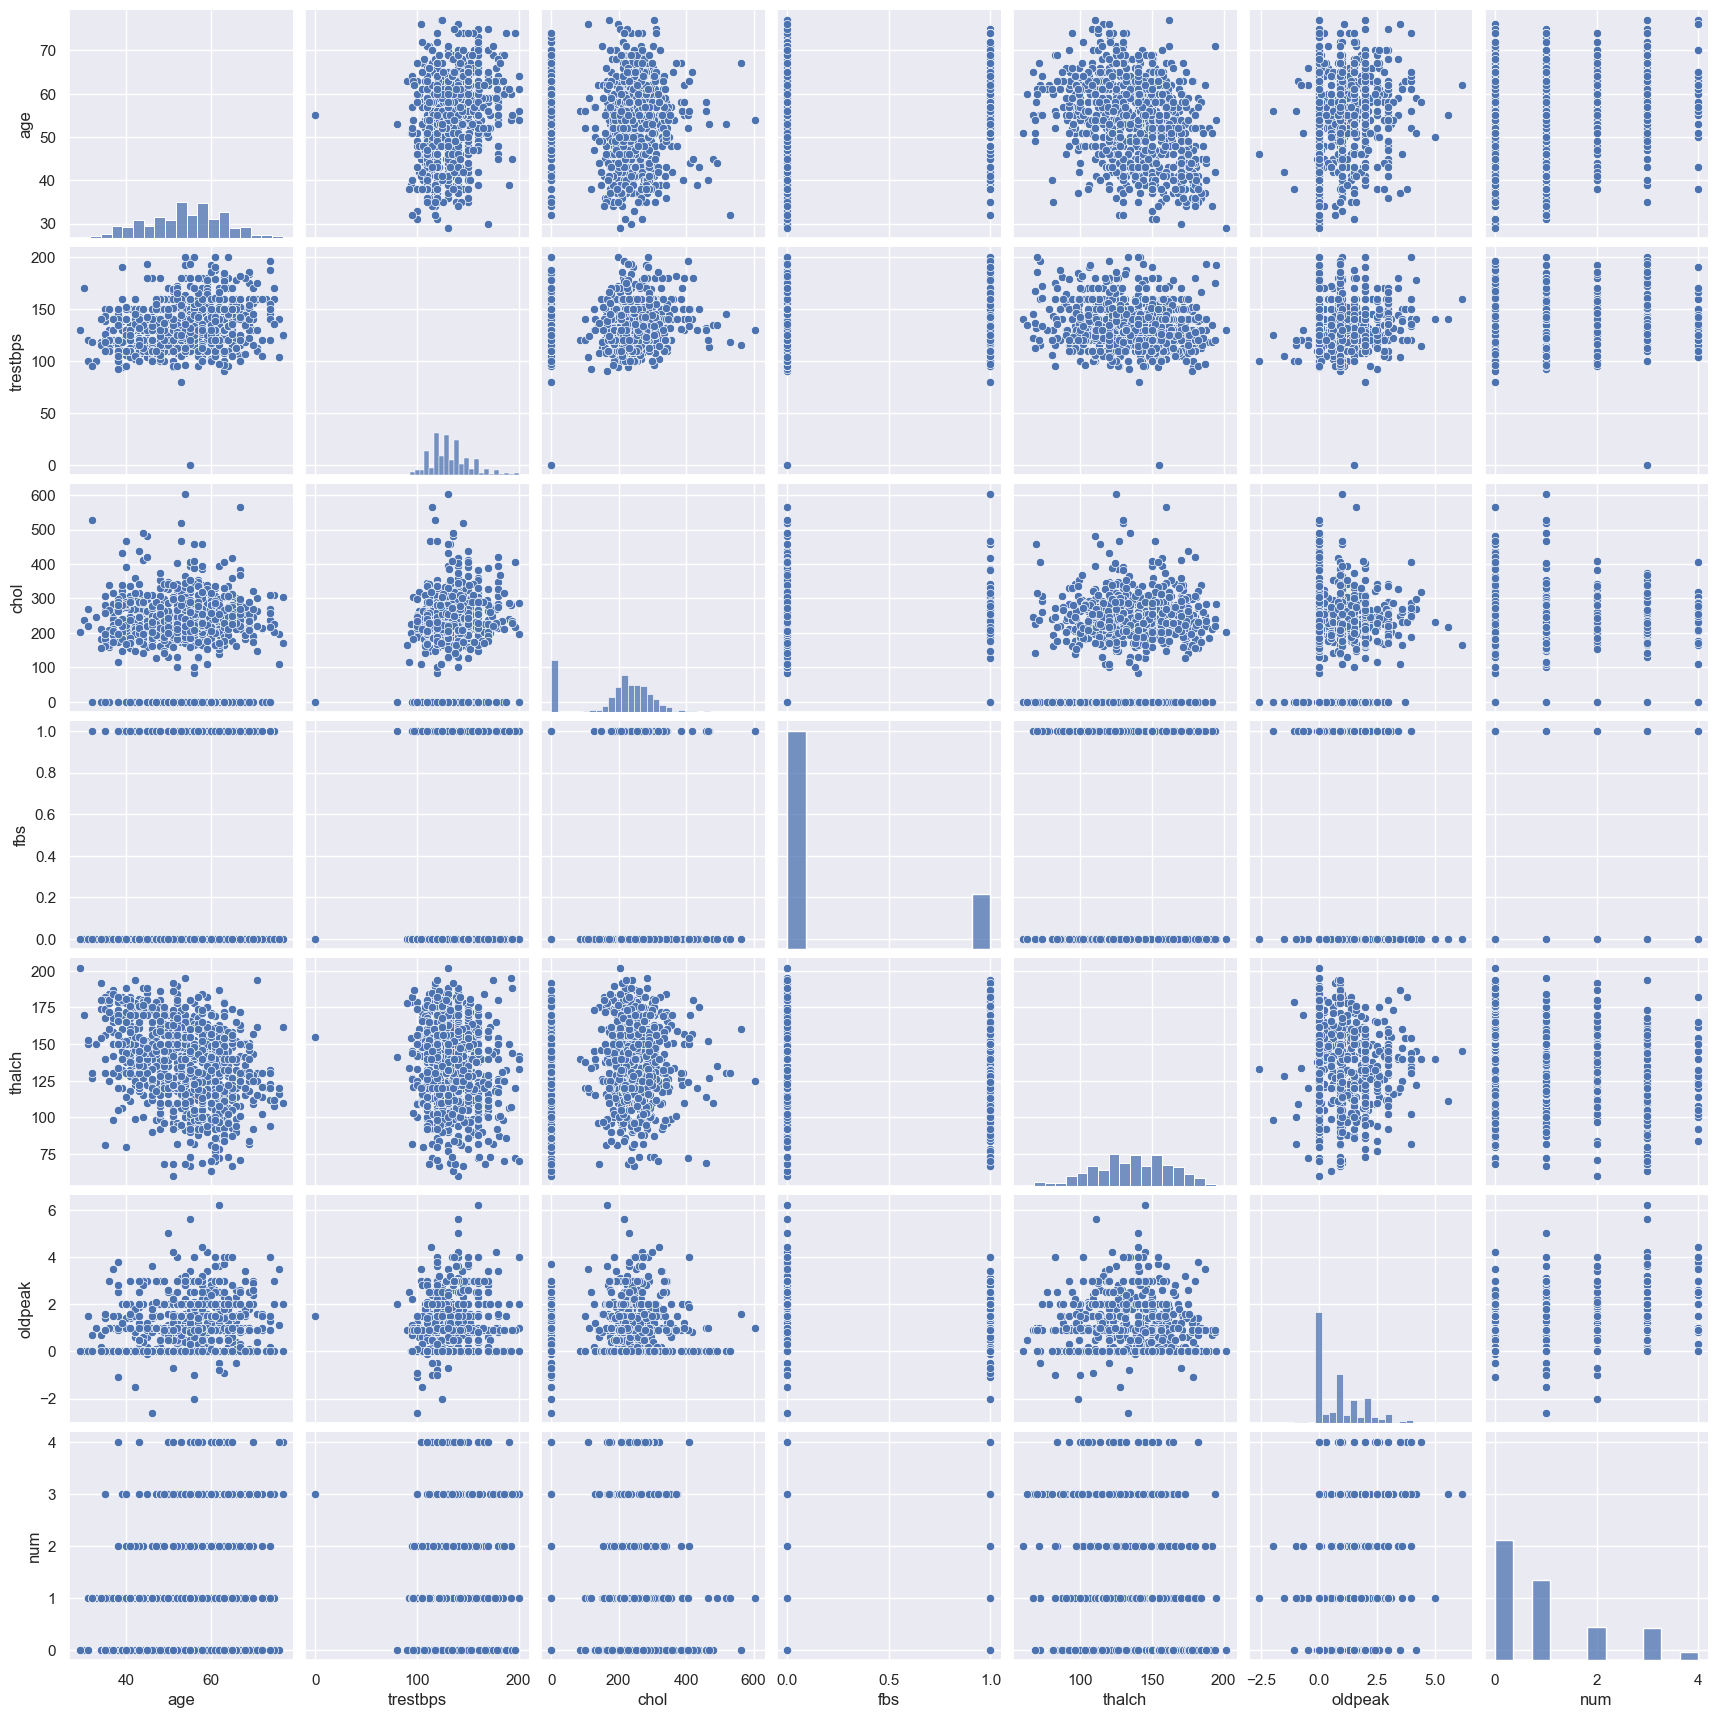

In [31]:
sns.pairplot(data)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

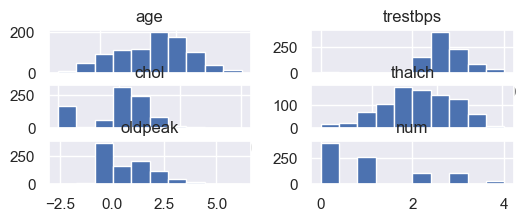

In [33]:
# Histograms
data.hist(figsize=(6,2))

<Axes: >

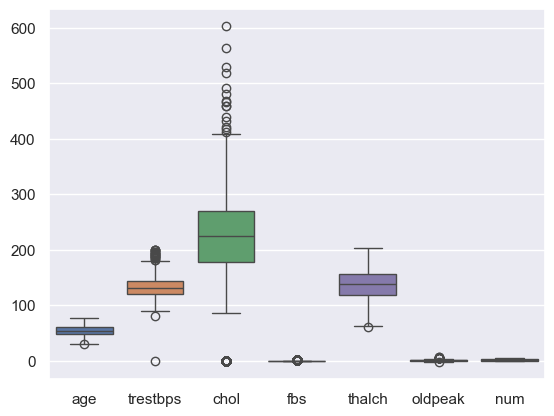

In [34]:
# Box plots
sns.boxplot(data=data)

In [37]:
correlation=data.corr(numeric_only=True)
correlation

age  trestbps      chol       fbs    thalch   oldpeak       num
age       1.000000  0.253999 -0.099967  0.176702 -0.328088  0.232718  0.326493
trestbps  0.253999  1.000000  0.117488  0.111614 -0.133360  0.152162  0.137251
chol     -0.099967  0.117488  1.000000 -0.113721  0.197907  0.028744 -0.238813
fbs       0.176702  0.111614 -0.113721  1.000000 -0.065428  0.022756  0.156268
thalch   -0.328088 -0.133360  0.197907 -0.065428  1.000000 -0.128728 -0.323058
oldpeak   0.232718  0.152162  0.028744  0.022756 -0.128728  1.000000  0.416580
num       0.326493  0.137251 -0.238813  0.156268 -0.323058  0.416580  1.000000

<Axes: >

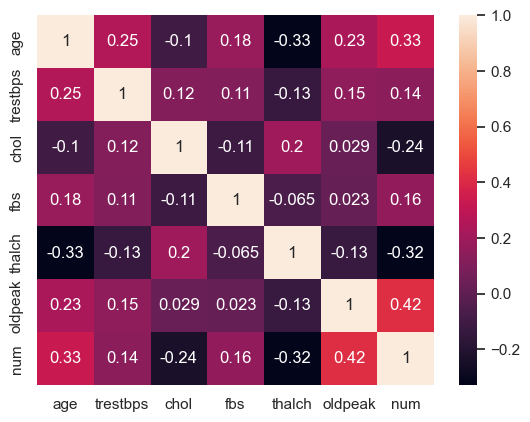

In [38]:
sns.heatmap(correlation,annot=True)

# 3 future engineering

In [140]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])
data['thal'] = le.fit_transform(data['thal'])

In [141]:
#scaling numeric values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['age','chol']] = scaler.fit_transform(data[['age','chol']])


# 4 Decision tree classification

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [93]:
X = data.iloc[:,:12].values#feature 
y = data.iloc[:,12].values#target

In [94]:
#Splitting data set into the training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=15)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((726, 12), (182, 12), (726,), (182,))

In [95]:
X = data.drop('sex', axis=1)
y = data.iloc[:,1]

In [96]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [97]:
#standardization to bring the datapoints to same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
classifier_DT=DecisionTreeClassifier(criterion ='gini',random_state=0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [99]:
#PREDICTING THE TEST SET VALUES
y_pred1 = classifier_DT.predict(X_train)
y_pred1

array([0, 0, 1, 4, 1, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 2, 4, 0,
       1, 3, 1, 2, 3, 0, 1, 1, 3, 0, 3, 3, 2, 2, 3, 3, 0, 0, 3, 0, 0, 0,
       0, 3, 1, 2, 3, 3, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1, 2, 2, 1, 0, 0,
       1, 1, 3, 1, 3, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 4, 2, 0, 2, 1, 2, 3,
       1, 3, 1, 0, 1, 1, 0, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 1, 0, 1, 1, 3, 1, 2, 2, 3, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 2, 4, 2, 0, 1, 0, 3, 1, 0,
       1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       0, 3, 0, 1, 3, 0, 0, 4, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0,
       4, 2, 1, 4, 3, 0, 0, 3, 3, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0,
       0, 3, 2, 1, 0, 0, 4, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 3, 0, 3, 0, 3,
       1, 2, 3, 1, 0, 0, 1, 3, 1, 1, 3, 1, 1, 0, 0,

In [101]:
cm=confusion_matrix(y_pred1,y_train)
print(cm)

[[321   0   0   0   0]
 [  0 211   0   0   0]
 [  0   0  93   0   0]
 [  0   0   0  78   0]
 [  0   0   0   0  23]]


In [105]:
cr=classification_report(y_train,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        23

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726



In [107]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [108]:
AR=accuracy_score(y_train,y_pred1)
print(AR)

1.0


In [112]:
pr=precision_score(y_train,y_pred1,average='weighted')
print(pr)

1.0


In [113]:
rc=recall_score(y_train,y_pred1,average='weighted')
print(rc)

1.0


In [114]:
f1=f1_score(y_train,y_pred1,average='weighted')
print(f1)

1.0


# 5 Hyperparameters

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [123]:
# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)


# 6 model evaluation and metrics

In [142]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree


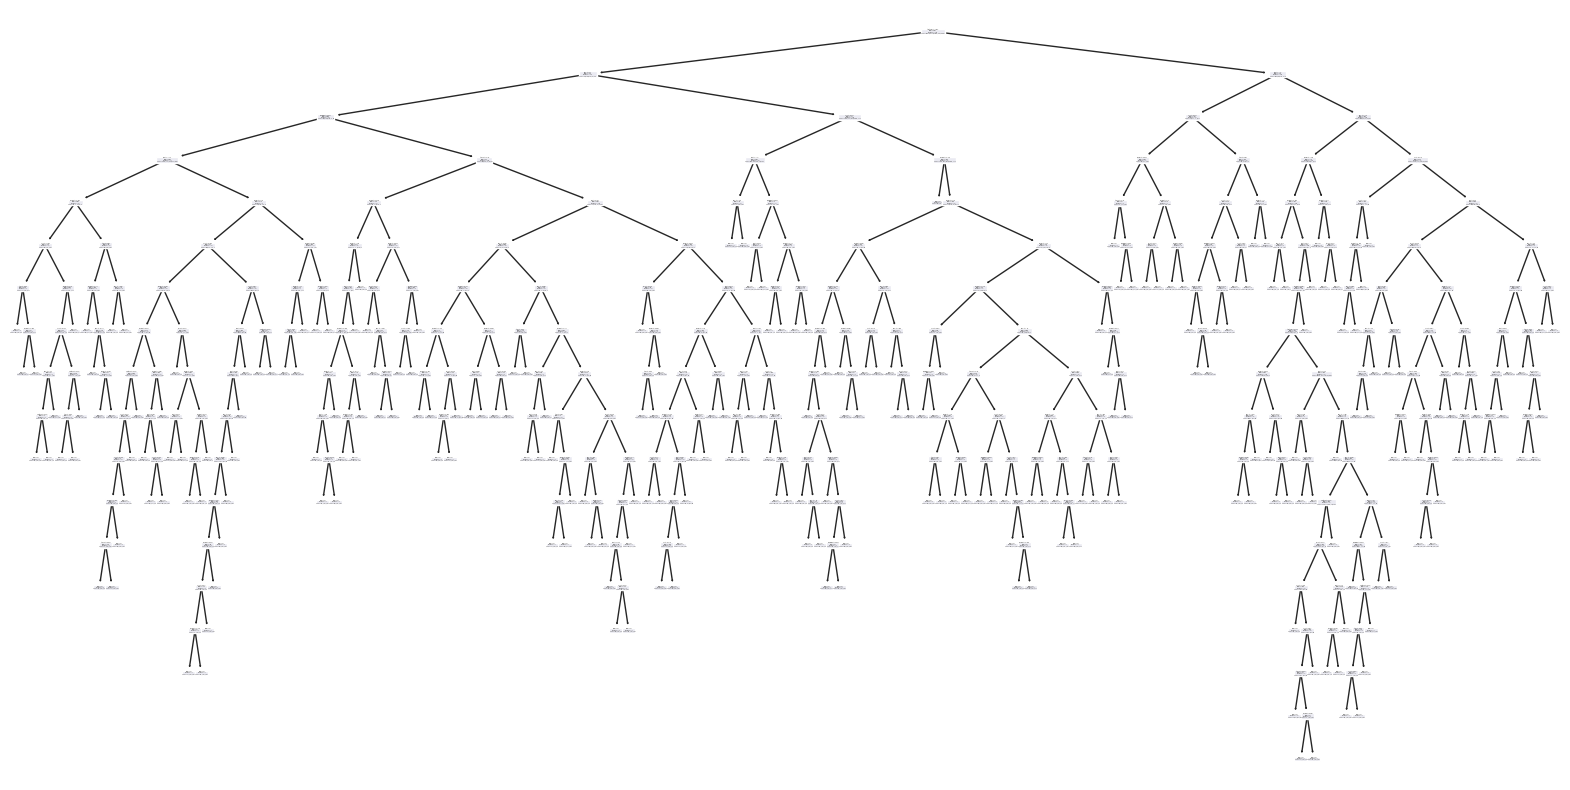

In [137]:
plt.figure(figsize=(20,10))
plot_tree(classifier_DT,feature_names=x.columns)
plt.show()


# interview questions

1 What are some common hyperparameters of decision tree models, and how do they affect the model's performance? 

Common decision tree hyperparameters include:max_depth,min_samples_split,min_samples_leaf,max_features
These hyperparameters impact model performance by controlling overfitting, underfitting, and feature interactions, influencing prediction accuracy and tree interpretability.

2.What is the difference between the Label encoding and One-hot encoding? 

Label encoding and one-hot encoding are both used to convert categorical data into numerical data, but they differ in their approach.
Label Encoding-
1.Assigns a unique numerical value to each category (e.g., 0, 1, 2, ...).
2.Treats categories as ordinal values (e.g., 0 < 1 < 2).
3.Can lead to implicit ordering or ranking of categories.
One-Hot Encoding-
1.Creates a binary vector for each category (e.g., [0, 1, 0], [0, 0, 1], ..)
2.Each category becomes a separate feature.
3.No implicit ordering or ranking of categories.